In [67]:
import numpy as np
import zarr
result_path = "./proofreading_results/result_20250303"
parameter_path = "./proofreading_results/parameters_20250218_jR"

z = zarr.open(parameter_path, "r")
parameters = z[:]
print("parameters: ", parameters.shape)
print("parameters: ", parameters[0])

betas = ["baseline", "b_ac1", "b_ac_rp1"]
z = zarr.open(result_path, mode="r")

print(list(z.keys()))

read_index = 0
results = []
for b in betas:
    group_b = z[b]
    t_max = "0"
    for t in group_b.keys():
        if float(t) > float(t_max):
            t_max = t
    results.append(group_b[t_max][:, read_index, :])
results = np.array(results)
print(results.shape)
print(results[0][0][-1])

parameters:  (40000, 5)
parameters:  [0. 0. 0. 0. 0.]
['b_ac1', 'b_ac1_n_ac6', 'baseline', 'b_ac_rp1', 'b_ac0.5', 'b_ac1_k_ac6', 'b_rp1', 'sender_ratio3', 'b_ac1_k_ac3', 'sender_region451', 'b_ac2', 'b_ac1_n_ac3']
(3, 8, 451)
0.00019193387785680576


/var/folders/fd/b1g1fr5n7xv98s13rfl1ncyw0000gn/T/ipykernel_6621/2442984355.py:6: FutureWarning: Pass mode=r as keyword args. From version 3.1.0 passing these as positional arguments will result in an error
  z = zarr.open(parameter_path, "r")


In [68]:
import numpy as np
import zarr
from shared import *
result_path="/Users/maozhuo/Desktop/proofreading_results/result_20250303"
parameter_path="/Users/maozhuo/Desktop/proofreading_results/parameters_20250218_jR"

z = zarr.open(parameter_path, "r")
parameters = z[:]
print("parameters: ", parameters.shape)

t_max = "172800"
betas = ["baseline", "b_ac1", "b_ac_rp1"]
z = zarr.open(result_path, mode="r")

# get the indices for b_ac_rp1
ac = z["b_ac_rp1"][t_max][Species.AC.value][:, -1]
bc = z["b_ac_rp1"][t_max][Species.BC.value][:, -1]

# get the indices for b_ac
ac_ac = z["b_ac1"][t_max][Species.AC.value][:, -1]
bc_ac = z["b_ac1"][t_max][Species.BC.value][:, -1]

# selection for eta>1e7, c>1e1, for figure 3c
proofreading_indices_3c = np.bitwise_and(
    ac_ac > 1e1,
    #ac_ac / bc_ac > 1e7,
    ac_ac / bc_ac < 1e2,
)
proofreading_indices_3c = np.where(proofreading_indices_3c)[0]

# selection for eta>1e9, c>1e2, for figure 4d
proofreading_indices = np.bitwise_and(
    ac > 100,
    ac / bc > 1e9,
    ac / bc < 1e10,
)
proofreading_indices = np.where(proofreading_indices)[0]



/var/folders/fd/b1g1fr5n7xv98s13rfl1ncyw0000gn/T/ipykernel_6621/4151700512.py:7: FutureWarning: Pass mode=r as keyword args. From version 3.1.0 passing these as positional arguments will result in an error
  z = zarr.open(parameter_path, "r")


parameters:  (40000, 5)


/var/folders/fd/b1g1fr5n7xv98s13rfl1ncyw0000gn/T/ipykernel_6621/4151700512.py:27: RuntimeWarning: divide by zero encountered in divide
  ac_ac / bc_ac < 1e2,
/var/folders/fd/b1g1fr5n7xv98s13rfl1ncyw0000gn/T/ipykernel_6621/4151700512.py:27: RuntimeWarning: invalid value encountered in divide
  ac_ac / bc_ac < 1e2,
/var/folders/fd/b1g1fr5n7xv98s13rfl1ncyw0000gn/T/ipykernel_6621/4151700512.py:34: RuntimeWarning: divide by zero encountered in divide
  ac / bc > 1e9,
/var/folders/fd/b1g1fr5n7xv98s13rfl1ncyw0000gn/T/ipykernel_6621/4151700512.py:34: RuntimeWarning: invalid value encountered in divide
  ac / bc > 1e9,
/var/folders/fd/b1g1fr5n7xv98s13rfl1ncyw0000gn/T/ipykernel_6621/4151700512.py:35: RuntimeWarning: divide by zero encountered in divide
  ac / bc < 1e10,
/var/folders/fd/b1g1fr5n7xv98s13rfl1ncyw0000gn/T/ipykernel_6621/4151700512.py:35: RuntimeWarning: invalid value encountered in divide
  ac / bc < 1e10,


In [69]:
n_gridpoints = 451
sender_region = 200
grid_spacing = 10 # µm
L = grid_spacing * (n_gridpoints - 1) # µm

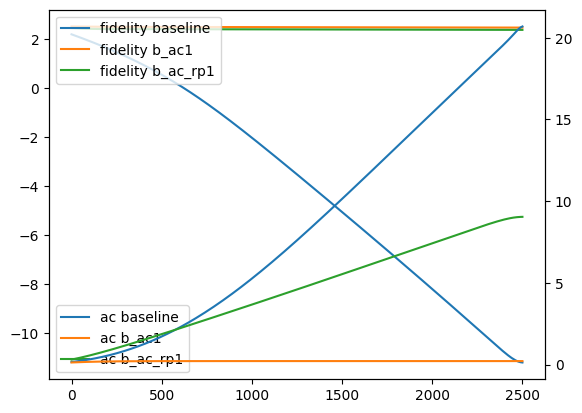

In [70]:
import matplotlib.pyplot as plt
read_index = np.random.choice(proofreading_indices)
betas = ["baseline", "b_ac1", "b_ac_rp1"]
results = []
for b in betas:
    results.append(z[b][t_max][:, read_index, :])
results = np.array(results)

# results: shape [n_beta, n_species(8), length(451)]

ac = results[:, Species.AC.value, :]
bc = results[:, Species.BC.value, :]

x = np.linspace(0, L, n_gridpoints)

ac_log = np.log10(ac)
bc_log = np.log10(bc)
fidelity = ac / bc
fidelity_log = np.log10(fidelity)

fig, ax = plt.subplots(1, 1)
ax2 = ax.twinx()
for i, b in enumerate(betas):
    ax.plot(x[:-sender_region], ac_log[i][sender_region:], label="ac " + b)
    ax2.plot(x[:-sender_region], fidelity_log[i][sender_region:], label="fidelity " + b)
ax.legend()
ax2.legend()
plt.show()


2


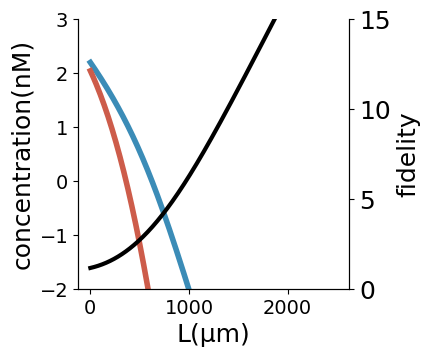

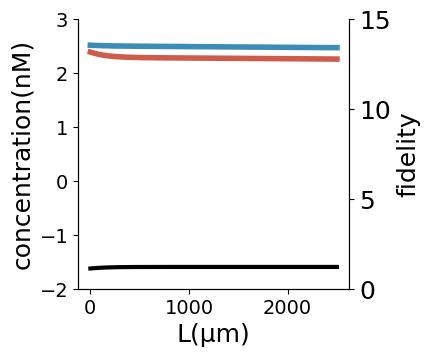

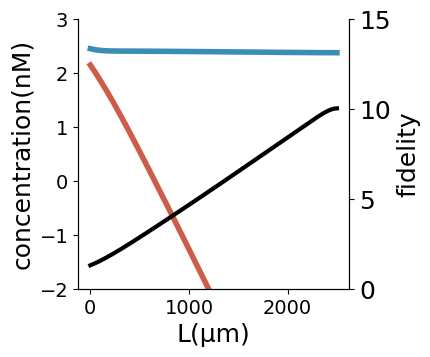

In [71]:

print(i)
labels = ["baseline", "b_ac1", "b_ac_rp1"]

for i, b in enumerate(betas):
    fig, ax = plt.subplots(figsize=(3.5, 3.5))  
    ax2 = ax.twinx()

    ax.spines["top"].set_visible(False)
    ax2.spines["top"].set_visible(False)

    ax.plot(x[:-sender_region], ac_log[i][sender_region:],linewidth=4, color='#3B8CB7', label='ER')
    ax.plot(x[:-sender_region], bc_log[i][sender_region:],linewidth=4, color='#CD5C4A', label='EW')
    ax2.plot(x[:-sender_region], fidelity_log[i][sender_region:]+1, linewidth=3, label='fidelity',color='k')

    ax.set_xlabel("L(μm)",fontsize=18)
    ax.set_ylabel("concentration(nM)",fontsize=18)
    ax2.set_ylabel("fidelity", fontsize=18)

    ax.tick_params(bottom=True, right=False, left=True, labelsize=14)
    ax2.tick_params(bottom=False, right=True, left=False, labelsize=14)
    ax.set_ylim(ymin=-2, ymax=3)
    ax2.set_ylim(ymin=0, ymax=15)

    #fig.savefig(f'fig4d_{labels[i].replace(" --> ", "_")}.svg', dpi=150)
    #legend1 = ax2.legend(loc='upper left', fontsize=12, bbox_to_anchor=(1.15, -0.2*i+0.90))
    plt.tick_params(bottom = bool, labelsize=18)


    plt.show()


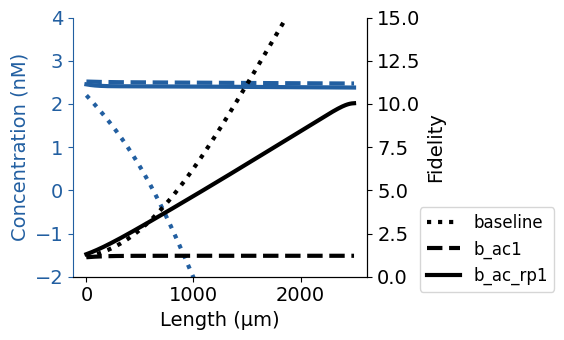

In [72]:
colors = ['#006d2c', '#E9C46A', '#00A0E9', '#00A0E9']
markers = ['p', 's', 'd', '*', 'v', '<', '>']
linestyles = ['dotted','--',   '-']
numbers = [0, 1, 2]

# results: shape [n_beta, n_species(8), length(451)]

ac = results[:, Species.AC.value, :]
bc = results[:, Species.BC.value, :]

ac_log = np.log10(ac)
fidelity = ac / bc
fidelity_log = np.log10(fidelity)

fig, ax1 = plt.subplots(figsize=(6, 3.5))  
ax2 = ax1.twinx()

for i,b in enumerate(betas):
    ax1.plot(x[:-sender_region],ac_log[i][sender_region:], label= b, color='#225FA1', alpha=1, linewidth=3, linestyle=linestyles[i])
    ax2.plot(x[:-sender_region],fidelity_log[i][sender_region:] + 1, label=  b, color='black', alpha=1, linewidth=3, linestyle=linestyles[i])

    i=i+1

ax1.spines["left"].set_color('#225FA1')
ax1.tick_params(axis='y', colors='#225FA1')
ax1.tick_params(axis='x', colors='black')
ax1.yaxis.label.set_color('#225FA1')

ax2.spines["right"].set_color('black')
ax2.tick_params(axis='y', colors='black')
ax2.yaxis.label.set_color('black')

ax1.spines["top"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(True)
ax2.spines["left"].set_visible(False)
ax1.tick_params(bottom=True, right=False, left=True, labelsize=14)
ax2.tick_params(bottom=False, right=True, left=False, labelsize=14)
ax1.set_ylim(ymin=-2, ymax=4)
ax2.set_ylim(ymin=0, ymax=15)

ax1.set_xlabel('Length (μm)', color='black', fontsize=14)
ax1.set_ylabel('Concentration (nM)', color='#225FA1', fontsize=14)
ax2.set_ylabel('Fidelity', color='black', fontsize=14)

legend1 = ax2.legend(loc='upper left', fontsize=12, bbox_to_anchor=(1.15, -0.2*i+0.90))
fig.tight_layout()

#plt.savefig('fig4d_break_traof.svg', dpi=150)
plt.show()

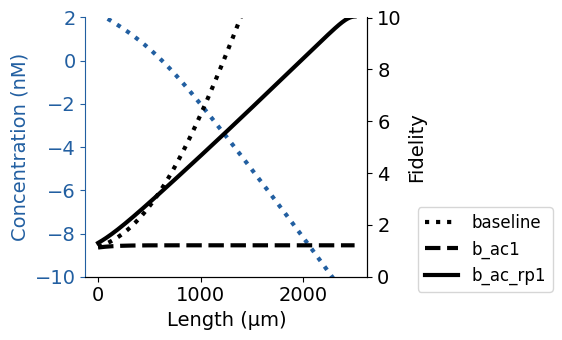

In [73]:
colors = ['#006d2c', '#E9C46A', '#00A0E9', '#00A0E9']
markers = ['p', 's', 'd', '*', 'v', '<', '>']
linestyles = ['dotted','--',   '-']
betas = ["baseline", "b_ac1", "b_ac_rp1"]
numbers = [0, 1, 2]

# results: shape [n_beta, n_species(8), length(451)]

ac = results[:, Species.AC.value, :]
bc = results[:, Species.BC.value, :]

ac_log = np.log10(ac)
fidelity = ac / bc
fidelity_log = np.log10(fidelity)

fig, ax1 = plt.subplots(figsize=(6, 3.5))  
ax2 = ax1.twinx()

for i,b in enumerate(betas):
    ax1.plot(x[:-sender_region],ac_log[i][sender_region:], label= b, color='#225FA1', alpha=1, linewidth=3, linestyle=linestyles[i])
    ax2.plot(x[:-sender_region],fidelity_log[i][sender_region:] + 1, label=  b, color='black', alpha=1, linewidth=3, linestyle=linestyles[i])

    i=i+1

ax1.spines["left"].set_color('#225FA1')
ax1.tick_params(axis='y', colors='#225FA1')
ax1.tick_params(axis='x', colors='black')
ax1.yaxis.label.set_color('#225FA1')

ax2.spines["right"].set_color('black')
ax2.tick_params(axis='y', colors='black')
ax2.yaxis.label.set_color('black')

ax1.spines["top"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(True)
ax2.spines["left"].set_visible(False)
ax1.tick_params(bottom=True, right=False, left=True, labelsize=14)
ax2.tick_params(bottom=False, right=True, left=False, labelsize=14)
ax1.set_ylim(ymin=-10, ymax=2)
ax2.set_ylim(ymin=0, ymax=10)

ax1.set_xlabel('Length (μm)', color='black', fontsize=14)
ax1.set_ylabel('Concentration (nM)', color='#225FA1', fontsize=14)
ax2.set_ylabel('Fidelity', color='black', fontsize=14)

legend1 = ax2.legend(loc='upper left', fontsize=12, bbox_to_anchor=(1.15, -0.2*i+0.90))
fig.tight_layout()

#plt.savefig('fig4d_break_traof_-8-2.svg', dpi=150)
plt.show()

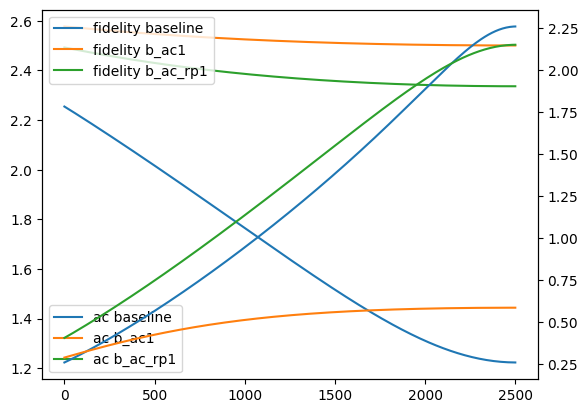

In [74]:
import matplotlib.pyplot as plt
read_index = np.random.choice(proofreading_indices_3c)
betas = ["baseline", "b_ac1", "b_ac_rp1"]
results = []
for b in betas:
    results.append(z[b][t_max][:, read_index, :])
results = np.array(results)

# results: shape [n_beta, n_species(8), length(451)]

ac = results[:, Species.AC.value, :]
bc = results[:, Species.BC.value, :]

x = np.linspace(0, L, n_gridpoints)

ac_log = np.log10(ac)
bc_log = np.log10(bc)
fidelity = ac / bc
fidelity_log = np.log10(fidelity)

fig, ax = plt.subplots(1, 1)
ax2 = ax.twinx()
for i, b in enumerate(betas):
    ax.plot(x[:-sender_region], ac_log[i][sender_region:], label="ac " + b)
    ax2.plot(x[:-sender_region], fidelity_log[i][sender_region:], label="fidelity " + b)
ax.legend()
ax2.legend()
plt.show()


2


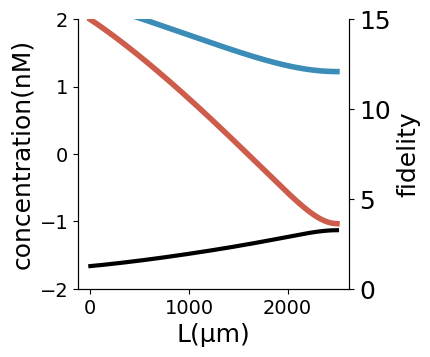

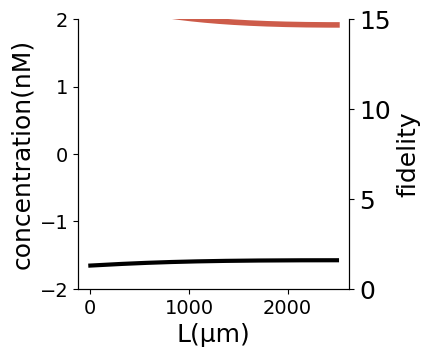

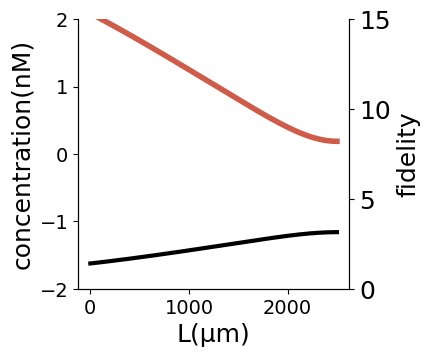

In [75]:

print(i)
labels = ["baseline", "b_ac1", "b_ac_rp1"]

for i, b in enumerate(betas):
    fig, ax = plt.subplots(figsize=(3.5, 3.5))  
    ax2 = ax.twinx()

    ax.spines["top"].set_visible(False)
    ax2.spines["top"].set_visible(False)

    ax.plot(x[:-sender_region], ac_log[i][sender_region:],linewidth=4, color='#3B8CB7', label='ER')
    ax.plot(x[:-sender_region], bc_log[i][sender_region:],linewidth=4, color='#CD5C4A', label='EW')
    ax2.plot(x[:-sender_region], fidelity_log[i][sender_region:]+1, linewidth=3, label='fidelity',color='k')

    ax.set_xlabel("L(μm)",fontsize=18)
    ax.set_ylabel("concentration(nM)",fontsize=18)
    ax2.set_ylabel("fidelity", fontsize=18)

    ax.tick_params(bottom=True, right=False, left=True, labelsize=14)
    ax2.tick_params(bottom=False, right=True, left=False, labelsize=14)
    ax.set_ylim(ymin=-2, ymax=2)
    ax2.set_ylim(ymin=0, ymax=15)

    fig.savefig(f'fig3c_{labels[i].replace(" --> ", "_")}.svg', dpi=150)
    #legend1 = ax2.legend(loc='upper left', fontsize=12, bbox_to_anchor=(1.15, -0.2*i+0.90))
    plt.tick_params(bottom = bool, labelsize=18)


    plt.show()


2


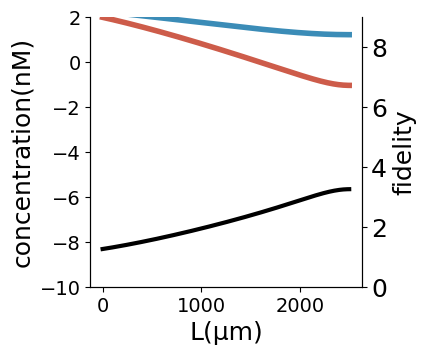

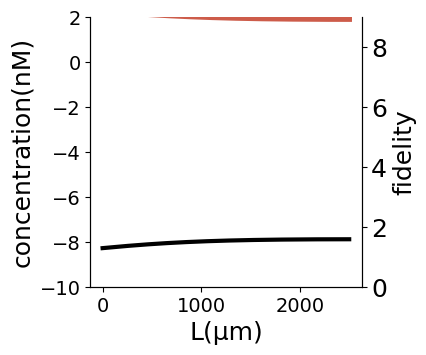

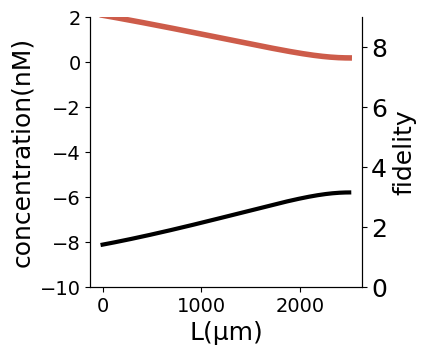

In [76]:

print(i)
labels = ["baseline", "b_ac1", "b_ac_rp1"]

for i, b in enumerate(betas):
    fig, ax = plt.subplots(figsize=(3.5, 3.5))  
    ax2 = ax.twinx()

    ax.spines["top"].set_visible(False)
    ax2.spines["top"].set_visible(False)

    ax.plot(x[:-sender_region], ac_log[i][sender_region:],linewidth=4, color='#3B8CB7', label='ER')
    ax.plot(x[:-sender_region], bc_log[i][sender_region:],linewidth=4, color='#CD5C4A', label='EW')
    ax2.plot(x[:-sender_region], fidelity_log[i][sender_region:]+1, linewidth=3, label='fidelity',color='k')

    ax.set_xlabel("L(μm)",fontsize=18)
    ax.set_ylabel("concentration(nM)",fontsize=18)
    ax2.set_ylabel("fidelity", fontsize=18)

    ax.tick_params(bottom=True, right=False, left=True, labelsize=14)
    ax2.tick_params(bottom=False, right=True, left=False, labelsize=14)
    ax.set_ylim(ymin=-10, ymax=2)
    ax2.set_ylim(ymin=0, ymax=9)

    fig.savefig(f'fig3c_1__{labels[i].replace(" --> ", "_")}.svg', dpi=150)
    #legend1 = ax2.legend(loc='upper left', fontsize=12, bbox_to_anchor=(1.15, -0.2*i+0.90))
    plt.tick_params(bottom = bool, labelsize=18)


    plt.show()


2


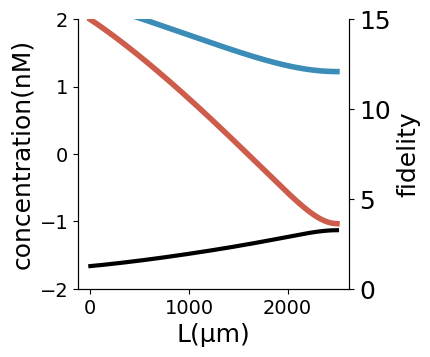

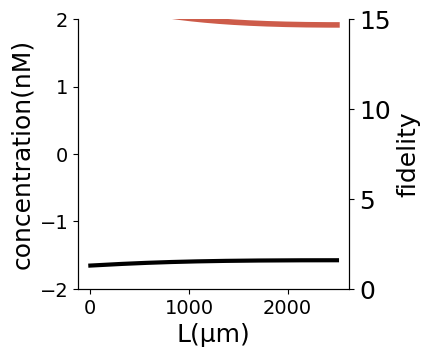

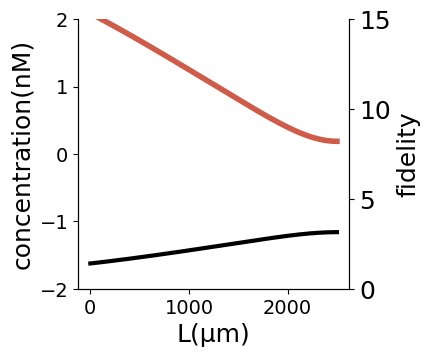

In [77]:

print(i)
labels = ["baseline", "b_ac1", "b_ac_rp1"]

for i, b in enumerate(betas):
    fig, ax = plt.subplots(figsize=(3.5, 3.5))  
    ax2 = ax.twinx()

    ax.spines["top"].set_visible(False)
    ax2.spines["top"].set_visible(False)

    ax.plot(x[:-sender_region], ac_log[i][sender_region:],linewidth=4, color='#3B8CB7', label='ER')
    ax.plot(x[:-sender_region], bc_log[i][sender_region:],linewidth=4, color='#CD5C4A', label='EW')
    ax2.plot(x[:-sender_region], fidelity_log[i][sender_region:]+1, linewidth=3, label='fidelity',color='k')

    ax.set_xlabel("L(μm)",fontsize=18)
    ax.set_ylabel("concentration(nM)",fontsize=18)
    ax2.set_ylabel("fidelity", fontsize=18)

    ax.tick_params(bottom=True, right=False, left=True, labelsize=14)
    ax2.tick_params(bottom=False, right=True, left=False, labelsize=14)
    ax.set_ylim(ymin=-2, ymax=2)
    ax2.set_ylim(ymin=0, ymax=15)

    #fig.savefig(f'fig3b_{labels[i].replace(" --> ", "_")}.svg', dpi=150)
    #legend1 = ax2.legend(loc='upper left', fontsize=12, bbox_to_anchor=(1.15, -0.2*i+0.90))
    plt.tick_params(bottom = bool, labelsize=18)


    plt.show()


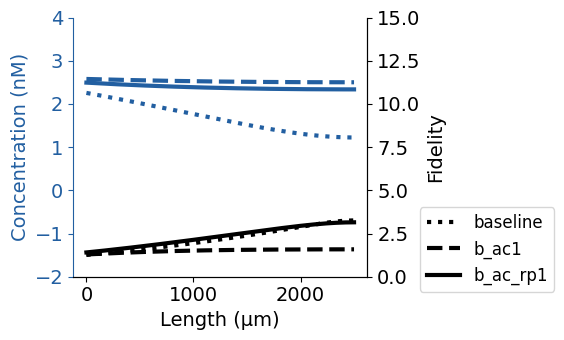

In [78]:
colors = ['#006d2c', '#E9C46A', '#00A0E9', '#00A0E9']
markers = ['p', 's', 'd', '*', 'v', '<', '>']
linestyles = ['dotted','--',   '-']
numbers = [0, 1]

# results: shape [n_beta, n_species(8), length(451)]

ac = results[:, Species.AC.value, :]
bc = results[:, Species.BC.value, :]

ac_log = np.log10(ac)
fidelity = ac / bc
fidelity_log = np.log10(fidelity)

fig, ax1 = plt.subplots(figsize=(6, 3.5))  
ax2 = ax1.twinx()

for i,b in enumerate(betas):
    ax1.plot(x[:-sender_region],ac_log[i][sender_region:], label= b, color='#225FA1', alpha=1, linewidth=3, linestyle=linestyles[i])
    ax2.plot(x[:-sender_region],fidelity_log[i][sender_region:] + 1, label=  b, color='black', alpha=1, linewidth=3, linestyle=linestyles[i])

    i=i+1

ax1.spines["left"].set_color('#225FA1')
ax1.tick_params(axis='y', colors='#225FA1')
ax1.tick_params(axis='x', colors='black')
ax1.yaxis.label.set_color('#225FA1')

ax2.spines["right"].set_color('black')
ax2.tick_params(axis='y', colors='black')
ax2.yaxis.label.set_color('black')

ax1.spines["top"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(True)
ax2.spines["left"].set_visible(False)
ax1.tick_params(bottom=True, right=False, left=True, labelsize=14)
ax2.tick_params(bottom=False, right=True, left=False, labelsize=14)
ax1.set_ylim(ymin=-2, ymax=4)
ax2.set_ylim(ymin=0, ymax=15)

ax1.set_xlabel('Length (μm)', color='black', fontsize=14)
ax1.set_ylabel('Concentration (nM)', color='#225FA1', fontsize=14)
ax2.set_ylabel('Fidelity', color='black', fontsize=14)

legend1 = ax2.legend(loc='upper left', fontsize=12, bbox_to_anchor=(1.15, -0.2*i+0.90))
fig.tight_layout()

#plt.savefig('fig4b_cite3c_break_traof.svg', dpi=150)
plt.show()

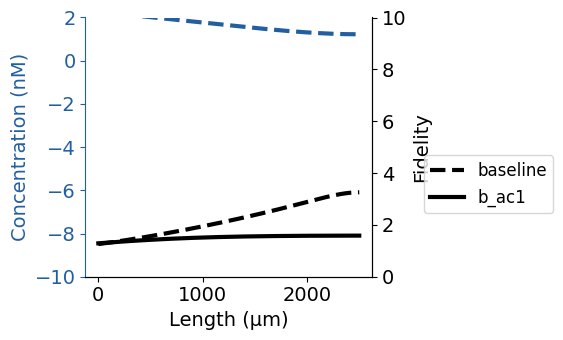

In [79]:
colors = ['#006d2c', '#E9C46A', '#00A0E9', '#00A0E9']
markers = ['p', 's', 'd', '*', 'v', '<', '>']
linestyles = ['--',   '-']
numbers = [0, 1]
betas = ["baseline", "b_ac1"]
# results: shape [n_beta, n_species(8), length(451)]

ac = results[:, Species.AC.value, :]
bc = results[:, Species.BC.value, :]

ac_log = np.log10(ac)
fidelity = ac / bc
fidelity_log = np.log10(fidelity)

fig, ax1 = plt.subplots(figsize=(6, 3.5))  
ax2 = ax1.twinx()

for i,b in enumerate(betas):
    ax1.plot(x[:-sender_region],ac_log[i][sender_region:], label= b, color='#225FA1', alpha=1, linewidth=3, linestyle=linestyles[i])
    ax2.plot(x[:-sender_region],fidelity_log[i][sender_region:] + 1, label=  b, color='black', alpha=1, linewidth=3, linestyle=linestyles[i])

    i=i+1

ax1.spines["left"].set_color('#225FA1')
ax1.tick_params(axis='y', colors='#225FA1')
ax1.tick_params(axis='x', colors='black')
ax1.yaxis.label.set_color('#225FA1')

ax2.spines["right"].set_color('black')
ax2.tick_params(axis='y', colors='black')
ax2.yaxis.label.set_color('black')

ax1.spines["top"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(True)
ax2.spines["left"].set_visible(False)
ax1.tick_params(bottom=True, right=False, left=True, labelsize=14)
ax2.tick_params(bottom=False, right=True, left=False, labelsize=14)
ax1.set_ylim(ymin=-10, ymax=2)
ax2.set_ylim(ymin=0, ymax=10)

ax1.set_xlabel('Length (μm)', color='black', fontsize=14)
ax1.set_ylabel('Concentration (nM)', color='#225FA1', fontsize=14)
ax2.set_ylabel('Fidelity', color='black', fontsize=14)

legend1 = ax2.legend(loc='upper left', fontsize=12, bbox_to_anchor=(1.15, -0.2*i+0.90))
fig.tight_layout()

plt.savefig('fig3c_break_traof.svg', dpi=150)
plt.show()